In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import sklearn 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

# 1. Gather Data

In [3]:
# Read in training and testing data using
data = pd.read_csv("Employee.csv")

# See a sample of the dataset
data.sample(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
3518,Bachelors,2015,Bangalore,3,38,Male,No,3,0
506,Masters,2014,New Delhi,3,28,Male,No,2,0
3847,Bachelors,2017,Bangalore,3,35,Male,Yes,0,0
3390,Bachelors,2012,Bangalore,3,39,Male,No,3,0
1780,Bachelors,2013,Bangalore,3,28,Male,No,2,1


In [4]:
data.describe(include = "all")

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


In [5]:
print('Features with null values:\n', data.isnull().sum())

Features with null values:
 Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [6]:
# Data Cleaning - Maimoonah
data = data.dropna()

In [11]:
# Data Cleaning - Maimoonah
data = pd.get_dummies(data, drop_first=True)
data.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,0,0,0,0,1,0
1,2013,1,28,3,1,0,0,0,1,0,0
2,2014,3,38,2,0,0,0,1,0,0,0
3,2016,3,27,5,1,1,0,0,0,1,0
4,2017,3,24,2,1,1,0,0,1,1,1


In [12]:
# Data Cleaning - Maimoonah
data.describe(include = "all")

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864,0.187621,0.038470,0.248657,0.272512,0.597034,0.102729
std,1.863377,0.561435,4.826087,1.558240,0.475047,0.390451,0.192348,0.432281,0.445300,0.490547,0.303638
min,2012.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
X = data.drop(['LeaveOrNot'], axis='columns')
y = data.LeaveOrNot

Intercept [-0.00600626] 
Coefficients: [[ 5.51509905e-04 -3.23739371e-01 -2.29039077e-02 -2.59082222e-02
   8.41355136e-01 -8.98177077e-02 -3.12994839e-01  6.93904441e-01
  -8.92364533e-01  6.96909792e-01]]
 tp: 288 
 tn: 1098 
 fp: 117 
 fn: 359 
 Accuracy(Score): 0.7443609022556391
 tp: 219 
 tn: 833 
 fp: 101 
 fn: 243 
 Accuracy(Score): 0.7535816618911175


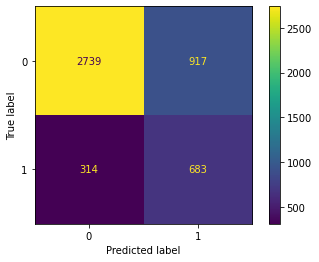

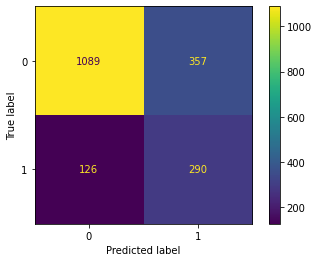

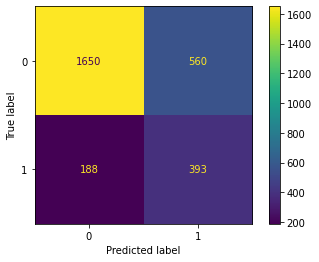

In [16]:
# Jiayi Zhang Logistic Regression
dflr = LogisticRegression(penalty='none',max_iter=10000)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=80)

dflr = dflr.fit(Xtrain,ytrain)

print(f"Intercept {dflr.intercept_} \nCoefficients: {dflr.coef_}")

ypr = dflr.predict(Xtest)

# Calculate the accuracy(Score),True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) 
tp = sum(np.logical_and(ypr == dflr.classes_[1], ytest == dflr.classes_[1]))
tn = sum(np.logical_and(ypr == dflr.classes_[0], ytest == dflr.classes_[0]))
fp = sum(np.logical_and(ypr == dflr.classes_[1], ytest == dflr.classes_[0]))
fn = sum(np.logical_and(ypr == dflr.classes_[0], ytest == dflr.classes_[1]))
acc = (tp + tn) / (tp + tn + fp + fn)
print(" tp:", tp, "\n","tn:",tn, "\n", "fp:", fp, "\n", "fn:", fn, "\n", "Accuracy(Score):", acc )

# When test size is 0.3
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X, y, test_size=0.3, random_state=80)
dflr3 = dflr.fit(Xtrain3,ytrain3)
ypr3 = dflr3.predict(Xtest3)
# Calculate the accuracy(Score),True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) 
tp3 = sum(np.logical_and(ypr3 == dflr3.classes_[1], ytest3 == dflr3.classes_[1]))
tn3 = sum(np.logical_and(ypr3 == dflr3.classes_[0], ytest3 == dflr3.classes_[0]))
fp3 = sum(np.logical_and(ypr3 == dflr3.classes_[1], ytest3 == dflr3.classes_[0]))
fn3 = sum(np.logical_and(ypr3 == dflr3.classes_[0], ytest3 == dflr3.classes_[1]))
acc3 = (tp3 + tn3) / (tp3 + tn3 + fp3 + fn3)
print(" tp:", tp3, "\n","tn:",tn3, "\n", "fp:", fp3, "\n", "fn:", fn3, "\n", "Accuracy(Score):", acc3 )

#plot confusion metrix for all data
yall = dflr.predict(X)
conf = confusion_matrix(yall,y)
ConfusionMatrixDisplay(conf).plot()
plt.show()

#plot confusion metrix for test data
yte = dflr.predict(Xtest)
conf = confusion_matrix(yte,ytest)
ConfusionMatrixDisplay(conf).plot()
plt.show()

#plot confusion metrix for train data
ytr = dflr.predict(Xtrain)
conf = confusion_matrix(ytr,ytrain)
ConfusionMatrixDisplay(conf).plot()
plt.show()

 tp: 290 
 tn: 1089 
 fp: 126 
 fn: 357 
 Accuracy(Score): 0.7406015037593985
 tp: 218 
 tn: 883 
 fp: 51 
 fn: 244 
 Accuracy(Score): 0.7886819484240688


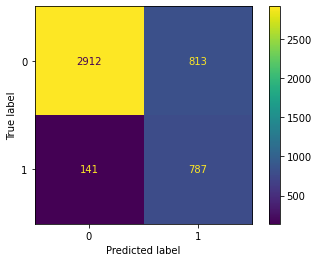

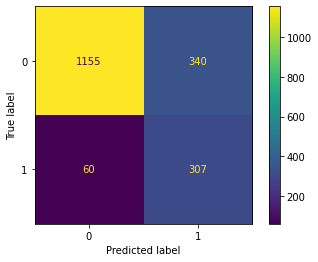

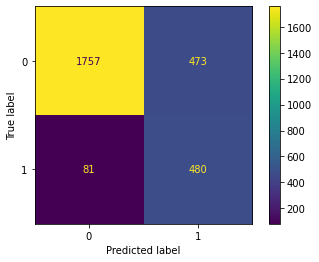

In [17]:
# Jiayi Zhang KNN
knn = KNeighborsClassifier(n_neighbors = 14)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=80)

knn = knn.fit(Xtrain,ytrain)

ypr = dflr.predict(Xtest)

# Calculate the accuracy(Score),True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) 
tp = sum(np.logical_and(ypr == dflr.classes_[1], ytest == dflr.classes_[1]))
tn = sum(np.logical_and(ypr == dflr.classes_[0], ytest == dflr.classes_[0]))
fp = sum(np.logical_and(ypr == dflr.classes_[1], ytest == dflr.classes_[0]))
fn = sum(np.logical_and(ypr == dflr.classes_[0], ytest == dflr.classes_[1]))
acc = (tp + tn) / (tp + tn + fp + fn)
print(" tp:", tp, "\n","tn:",tn, "\n", "fp:", fp, "\n", "fn:", fn, "\n", "Accuracy(Score):", acc )

# When test size is 0.3
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X, y, test_size=0.3, random_state=80)
dflr3 = knn.fit(Xtrain3,ytrain3)
ypr3 = knn.predict(Xtest3)
# Calculate the accuracy(Score),True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) 
tp3 = sum(np.logical_and(ypr3 == dflr3.classes_[1], ytest3 == dflr3.classes_[1]))
tn3 = sum(np.logical_and(ypr3 == dflr3.classes_[0], ytest3 == dflr3.classes_[0]))
fp3 = sum(np.logical_and(ypr3 == dflr3.classes_[1], ytest3 == dflr3.classes_[0]))
fn3 = sum(np.logical_and(ypr3 == dflr3.classes_[0], ytest3 == dflr3.classes_[1]))
acc3 = (tp3 + tn3) / (tp3 + tn3 + fp3 + fn3)
print(" tp:", tp3, "\n","tn:",tn3, "\n", "fp:", fp3, "\n", "fn:", fn3, "\n", "Accuracy(Score):", acc3 )

#plot confusion metrix for all data
yall = knn.predict(X)
conf = confusion_matrix(yall,y)
ConfusionMatrixDisplay(conf).plot()
plt.show()

#plot confusion metrix for test data
yte = knn.predict(Xtest)
conf = confusion_matrix(yte,ytest)
ConfusionMatrixDisplay(conf).plot()
plt.show()

#plot confusion metrix for train data
ytr = knn.predict(Xtrain)
conf = confusion_matrix(ytr,ytrain)
ConfusionMatrixDisplay(conf).plot()
plt.show()